✅ Dataset loaded from Hugging Face
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
🔹 Accuracy: 0.875


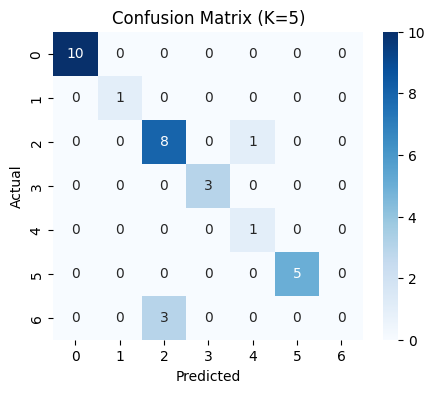

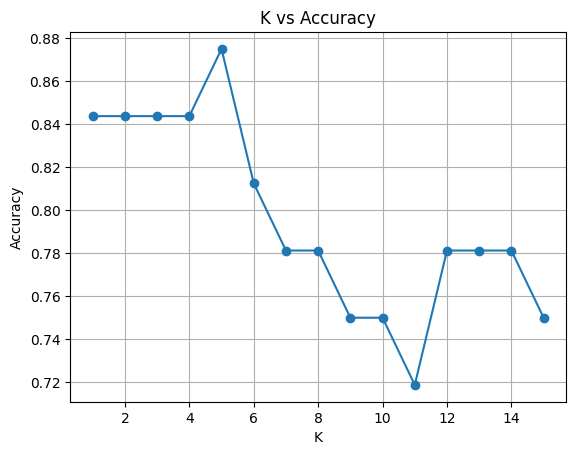

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://huggingface.co/datasets/scikit-learn/Fish/raw/main/Fish.csv"
df = pd.read_csv(url)
print("✅ Dataset loaded from Hugging Face")
print(df.head())

df['Species'] = LabelEncoder().fit_transform(df['Species'])
X = df.drop('Species', axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(f"🔹 Accuracy: {accuracy_score(y_test, pred):.3f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (K=5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracies = []
for k in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(range(1, 16), accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
